# Clean dataset

In [ ]:
import pandas as pd #use pandas to read dataset
import os

In [ ]:
data = pd.read_csv(os.path.join("csvs", "combined.csv"), encoding = "ISO-8859-1")

In [ ]:
#display shape and dimension
data.head() #displayy the first 5 rows of datasets

In [ ]:
# Filter out columns with 'Unnamed' in their title
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
#display last 5 rows of dataset
data.tail()

In [ ]:
# Check if label has only real or fake
invalid_indices = data[~data['label'].isin(['Real', 'Fake'])].index

# Remove rows with invalid values in the 'label' column
data.drop(invalid_indices, inplace=True)

In [ ]:
data.info()

In [ ]:
#find out how many row and columns
data.shape


In [ ]:
data.columns #display all columns

In [ ]:
#display datatype each columns
data.dtypes

In [ ]:
##clean dataset
#check missing value and remove it
#remove duplicate data
missing_values_rows = data.isnull().any(axis=1) #check row has missing value or not, if it's has then return true
print("Row with Missing Values:")
print(missing_values_rows) #print all row that has missing values , True= row with missing value

In [ ]:
#check duplicate dattaset
duplicate_rows = data[data.duplicated()]
print("Duplicated Rows:")
print(duplicate_rows)

In [ ]:
#clean the data
data.dropna(axis=0, inplace=True)#remove missising value

In [ ]:
# data.drop_duplicates(inplace=True)#remove duplicate data

In [ ]:
#save the dataset that's we have clean
data.to_csv("cleaned_dataset.csv", index=False)

In [ ]:
file_path = "cleaned_dataset.csv"

#News Source Credibility Analysis , Calculate News sources credibility

count the number of reaal and fake articles for each source

In [ ]:
source_count =   data.groupby(["site_url","label"]).size().unstack(fill_value=0)


Calculate % of real news and fake news

In [ ]:
# Real News
source_count["Percentage Real (%)"] = (source_count["Real"]/(source_count["Real"]+source_count["Fake"])) * 100

# Fake News
source_count["Percentage Fake (%)"] = (source_count["Fake"]/(source_count["Real"]+source_count["Fake"])) * 100

Sort Credibility based on the %

In [ ]:
sorted_sources = source_count.sort_values(by="Percentage Real (%)", ascending = False)

Print top 10 news stats

In [ ]:
print("Top 10 Most Credible News Sources:")
for source, row in sorted_sources.head(10).iterrows():
  print(f"News {source}, fake news = {row['Percentage Fake (%)']:.1f}%")

print("\nTop 10 Least Credible News Sources:")
for source, row in sorted_sources.tail(10).iterrows():
  print(f"News {source}, fake news = {row['Percentage Fake (%)']:.1f}%")

#ยิ่ง percent เยอะ จะเข้าข่ายfakenews

# Detecting Keywords Associated with Fake News

In [1]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize  #nltl = natural language tool kit
from nltk.corpus import stopwords
from collections import Counter

Identify Most Frequent Keyword

In [2]:
data = pd.read_csv("cleaned_dataset.csv")
nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tonkhaow\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tonkhaow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Count Occurrences of titles and text

In [3]:
title_counter = Counter()
text_counter = Counter()
for index, row in data.iterrows():
  # tokenize text - splits text into words
  title_words = word_tokenize(row["title"])
  text_words = word_tokenize(row["text"])
  # Filter out non-alphabetic words and stopwords from the title and text, change words to lowercase
  title_words = [word.lower() for word in title_words if word.isalpha() and word.lower() not in stop_words]
  text_words = [word.lower() for word in title_words if word.isalpha() and word.lower() not in stop_words]

  # Check if the label of the current row is "Fake"
  if row["label"] == "Fake":
    # Update the title_counter and text_counter with the fake title_words and text_words
    title_counter.update(title_words)
    text_counter.update(text_words)
top_keywords_title = title_counter.most_common(5)
top_keywords_text = text_counter.most_common(5)

Print Top Keywords that is assiciated with Fake News

In [4]:
print("Top 5 Keywords Associated with Fake News Titles:")
for keyword, count in top_keywords_title:
  print(f"{keyword}: {count} times")
print("\nTop 5 Keywords Associated with Fake News Texts:")
for keyword, count in top_keywords_text:
  print(f"{keyword}: {count} times")

Top 5 Keywords Associated with Fake News Titles:
trump: 135 times
hillary: 129 times
clinton: 121 times
title: 101 times
us: 59 times

Top 5 Keywords Associated with Fake News Texts:
trump: 135 times
hillary: 129 times
clinton: 121 times
title: 101 times
us: 59 times


# News Title and text length analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data["title_length"] = data["title"].apply(len)
data["text_length"] = data["text"].apply(len)

In [7]:
real_news = data[data["label"]=="Real"]
fake_news = data[data["label"]=="Fake"]

In [8]:
avg_real_title_length = real_news["title_length"].mean()
avg_fake_title_length = fake_news["title_length"].mean()
avg_real_text_length = real_news["text_length"].mean()
avg_fake_text_length = fake_news["text_length"].mean()

In [9]:
print(f"Average Title Length for Real News: {avg_real_title_length:.2f} characters")
print(f"Average Title Length for Fake News: {avg_fake_title_length:.2f} characters")
print(f"Average Text Length for Real News: {avg_real_text_length:.2f} characters")
print(f"Average Text Length for Fake News: {avg_fake_text_length:.2f} characters")

Average Title Length for Real News: 56.67 characters
Average Title Length for Fake News: 64.77 characters
Average Text Length for Real News: 3170.10 characters
Average Text Length for Fake News: 2829.06 characters


In [10]:
labels = ["Real Title","Fake News","Real Text","Fake Text"]
lengths = [avg_real_title_length, avg_fake_title_length, avg_real_text_length,avg_fake_text_length ]

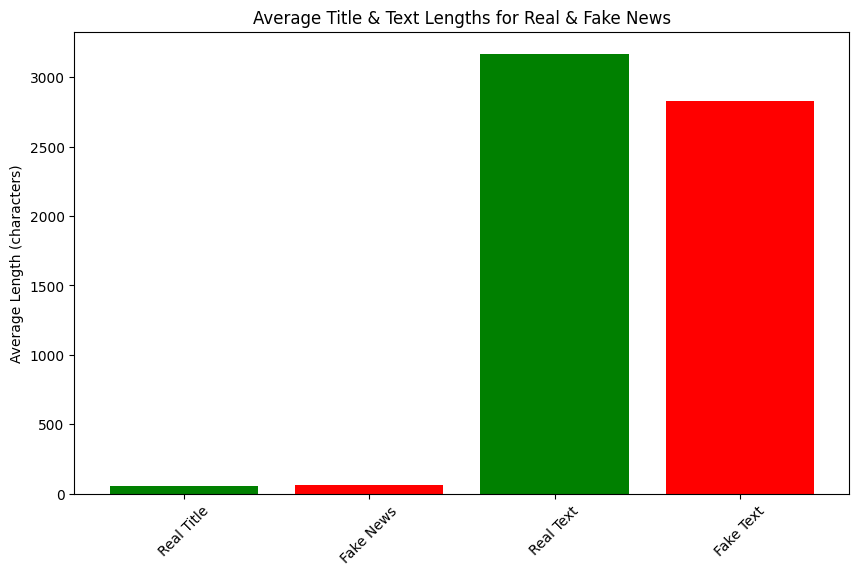

In [11]:

plt.figure(figsize=(10,6))
plt.bar(labels,lengths,color=["green","red","green","red"])
plt.title("Average Title & Text Lengths for Real & Fake News")
plt.ylabel("Average Length (characters)")
plt.xticks(rotation=45)
plt.show()

# Detecting sensationalism in fake news

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency
import re

In [13]:
def detect_sensationalism(text):
    sensational_keywords = ["shocking", "outrageous", "unbelievable", "mind-blowing", "explosive"]

    for keyword in sensational_keywords:
        if re.search(r'\b' + keyword + r'\b', text, re.IGNORECASE):
            return True
    return False

In [14]:
data["Sensationalism"] = data["text"].apply(detect_sensationalism)


In [15]:
contigency_table = pd.crosstab(data["Sensationalism"],data["label"])
print(contigency_table)


label           Fake  Real
Sensationalism            
False           1213   722
True              78    31


In [16]:
chi2,p,_,_ = chi2_contingency(contigency_table)



In [17]:
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared statistic: 3.1200170742463156
P-value: 0.07733597325641271


In [18]:
alpha = 0.05
if p < alpha:
  print("There is a significant association between sensationalism and credibility of the news")
else:
  print("There is not significant association between sensationalism and credibility of the news")

There is not significant association between sensationalism and credibility of the news


# Analyzing Emotion in Fake news with NLP

In [19]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tonkhaow\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
analyzer = SentimentIntensityAnalyzer()


In [22]:
# Defining a function to analyze the sentiment of text using VADER sentiment analysis
def analyze_sentiment(text):
  # Getting the polarity scores for the text
  sentiment_score = analyzer.polarity_scores(text)
  if sentiment_score["compound"] >= 0.05:
    return "Positive"
  elif sentiment_score["compound"] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [23]:
data["Sentiment"] = data["text"].apply(analyze_sentiment)

In [24]:
print(data[['text','Sentiment']].head())

                                                text Sentiment
0  print they should pay all the back all the mon...  Positive
1  why did attorney general loretta lynch plead t...  Negative
2  red state  \nfox news sunday reported this mor...  Positive
3  email kayla mueller was a prisoner and torture...  Positive
4  email healthcare reform to make america great ...  Positive


# Detecting Fake News with Feature Engineering

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

fake_news_data = data[data['label'] == "Fake"]
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(fake_news_data["text"])
word_frequencies = X.toarray().sum(axis=0)
feature_names = vectorizer.get_feature_names_out()
keywords = [feature_names[i] for i in word_frequencies.argsort()[-10:][::-1]]
print(keywords)

site_counts = data["site_url"].value_counts()
fake_site_counts = data[data["label"]=="Fake"]["site_url"].value_counts()
fake_news_percentage = fake_site_counts / site_counts

def fakenewsprediction(title, news_source):
  title_contains_keyword = any(keyword in title.lower() for keyword in keywords)
  if news_source in fake_news_percentage:
    source_fake_percentage = fake_news_percentage[news_source]
  else:
    source_fake_percentage = 0.0

  if title_contains_keyword and source_fake_percentage > 0.5:
    return "Fake News"
  else:
    return "Real News"

text_input = "Breaking: election week is over"
source_input = "der-postillon.com"
prediction = fakenewsprediction(text_input,source_input)
print(f"Prediction: {prediction}")

['clinton', 'trump', 'said', 'hillary', 'people', 'like', 'just', 'election', 'new', 'time']
Prediction: Fake News


# Detecing Fake News with Logistic Regression

In [26]:
fake_count = (data['label'] == "Fake").sum()
print("Number of data labels labeled as 'fake':", fake_count)
fake_count = (data['label'] == "Real").sum()
print("Number of data labels labeled as 'Real':", fake_count)

Number of data labels labeled as 'fake': 1291
Number of data labels labeled as 'Real': 753


In [39]:
# Convert labels
data['label'] = data['label'].replace({"Fake": 1, "Real": 0})

# Count occurrences
fake_count = (data['label'] == 1).sum()
print("Number of data labels labeled as 'Fake':", fake_count)

real_count = (data['label'] == 0).sum()
print("Number of data labels labeled as 'Real':", real_count)

Number of data labels labeled as 'Fake': 1291
Number of data labels labeled as 'Real': 753


Under sampling data

In [40]:
# Filter out rows with 'real' label
fake_data = data[data['label'] == 1]

# Sample the same number of rows labeled as 'real'
real_data = data[data['label'] == 0].sample(n=len(fake_data), random_state=42, replace=True)

# Concatenate the balanced data
balanced_data = pd.concat([fake_data, real_data])

# Shuffle the balanced data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the counts of labels in the balanced data
print("Number of data labels labeled as 'fake' in balanced data:", (balanced_data['label'] == 1).sum())
print("Number of data labels labeled as 'real' in balanced data:", (balanced_data['label'] == 0).sum())




Number of data labels labeled as 'fake' in balanced data: 1291
Number of data labels labeled as 'real' in balanced data: 1291


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

missing_data = data[["text","label"]].isnull().any(axis=1)
if missing_data.any():
  print("Missing Values Found in the Dataset. Handle Missing Data Before Proceeding")
else:
  le = LabelEncoder()
  balanced_data["label"] = le.fit_transform(balanced_data["label"])
  X = balanced_data["text"]
  y = balanced_data["label"]
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=20)
  text_feature_extraction = TfidfVectorizer(max_features=5000,stop_words="english")
  model = LogisticRegression()
  pipeline = Pipeline([
      ('tfidf',text_feature_extraction),
      ('model',model)
  ])
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)

  #Evaluate
  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  # Print evaluation metrics
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
  print("Confusion Matrix:\n", conf_matrix)
  print("ROC AUC Score:", roc_auc)

  

Accuracy: 0.8301158301158301
Precision: 0.8257575757575758
Recall: 0.8384615384615385
F1 Score: 0.8320610687022901
Confusion Matrix:
 [[106  23]
 [ 21 109]]
ROC AUC Score: 0.8300834824090638


Hyperparamter Tuning

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Assuming balanced_data is defined somewhere in your code
X = balanced_data["text"]
y = balanced_data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

# Define the pipeline with TF-IDF vectorizer and logistic regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words="english")),
    ('model', LogisticRegression())
])

# Define the grid of hyperparameters to search
param_grid = {
    'tfidf__max_features': range(1000, 11000, 1000),
    'model__C': [0.1, 1, 10]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_test)

# Evaluate the performance of the tuned model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)


Best Parameters: {'model__C': 10, 'tfidf__max_features': 10000}
Accuracy: 0.8648648648648649
Precision: 0.8925619834710744
Recall: 0.8307692307692308
F1 Score: 0.8605577689243028
Confusion Matrix:
 [[116  13]
 [ 22 108]]
ROC AUC Score: 0.8649970184853907


Evaluate the logistic regression model

In [43]:
def fakenewsprediction(text):
    input_data = [text]
    prediction = best_estimator.predict(input_data)
    if prediction[0] == 0:
        return "Real News"
    else:
        return "Fake News"

In [53]:
import re

article_input = """Bitcoin has started the week with a surge, dragging the rest of the cryptocurrency space higher with it. Late last week Bitcoin tried and failed to make a fresh all-time Bitcoin demand remains high, but this morning a new ATH was achieved with ease as buyers took control of the market. Bitcoin demand remains highs, driven primarily by the new ETF providers, while new supply is limited. The supply side of the equation will soon get tighter when the Bitcoin halving event takes place in mid-April. News also out earlier that the LSE plans to accept applications for Bitcoin and Ethereum ETNs in Q2 may have also helped today’s push higher."""
prediction = fakenewsprediction(article_input.replace('\n', ' '))
print(f"Prediction: {prediction}")

Prediction: Fake News


# Detecting Fake News with Random Forest

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X = data["title"]
y = data["label"]

tfidf_vectorizer = TfidfVectorizer(max_features=5000,stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_tfidf,y_encoded)

def fakenewsprediction(title):
  title_tfidf = tfidf_vectorizer.transform([title])
  prediction = random_forest_classifier.predict(title_tfidf)
  predicted_label = label_encoder.inverse_transform(prediction)
  return predicted_label[0]

title_input = "Few reasons for optimism after Antony Blinken's diplomatic dash"
prediction = fakenewsprediction(title_input)
print(f"Prediction: {prediction}")

# Evaluate modeedl with confusion matrix

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

X = data["title"]
y = data["label"]

tfidf_vectorizer = TfidfVectorizer(max_features=5000,stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y_encoded,test_size=0.2,random_state=42)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train,y_train)

y_pred = random_forest_classifier.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:")
print(cm)

# Performing Audit

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X = data["title"]
y = data["label"]
tfidf_vectorizer = TfidfVectorizer(max_features=5000,stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y_encoded,test_size=0.2,random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train,y_train)
y_pred = random_forest_classifier.predict(X_test)

def demographic_parity_difference(y_true,y_pred):
  group1_indices = [i for i,y in enumerate(y_true) if y == 0]
  group2_indices = [i for i,y in enumerate(y_true) if y == 1]
  group1_positive_rate = sum(1 for i in group1_indices if y_pred[i] == 1)/len(group1_indices)
  group2_positive_rate = sum(1 for i in group2_indices if y_pred[i] == 1)/len(group2_indices)
  dp_diff = abs(group1_positive_rate - group2_positive_rate)
  return dp_diff

dp_diff = demographic_parity_difference(y_test,y_pred)
print(f"Demographic Parity Difference: {dp_diff:.4f}")